# Assignment 7: Neural Networks

## Module 7 Group 32: Seyedehnaghmeh Mosaddeghi(20 h) - Aghigh Merikhi(20 h)

Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

This assignment will work with the MNIST data set. The MNIST dataset is a standard benchmark
 where small 28x28 pixel grayscale images of handwritten digits. For each image, the US Census
 Bureau manually assigned a class label, an integer from 0 to 9. The task associated with the
 dataset is building a model that takes a new image (of the same size) and returns a class label
 that is, an integer from 0 to 9.

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [3]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11490434/11490434 [==============================] - 6s 1us/step


**1- Preprocessing**


1.1. Explain the data pre-processing highlighted in the notebook

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


Here is the detail explanation of each step: 

1. Data Type Conversion: In this step, the pixel values from the training and test data ('x_train' and 'x_test') are transformed to the data type 'float32'. This is important because neural networks frequently employ floating-point values in their operations. The 'float32' data type makes sure that the pixel values are shown as 32-bit floating-point integers, which are appropriate for further networked mathematical calculations.

2. Normalization: The pixel values are normalized after the data type conversion. The grayscale values, which range from 0 to 255 and indicate black and white, are the original representations of the pixel values. Each pixel's value is normalized by multiplying it by 255. The pixel values are scaled in this procedure to lie between [0, 1]. Machine learning frequently uses normalization because it assures that all input characteristics  are on a comparable scale, which enhance training. In addition, when working with unnormalized data, it might lead to problems with exploding gradients during training

3. One-Hot Label Encoding: One-hot encoding is used for the labels, which stand in for the actual numbers (like 0 to 9). A method for multi-class classification tasks is one-hot encoding. The integer labels are transformed into binary vectors, where each class represents a different binary location.

2. Network model, training, and changing hyper-parameters

2.1. How many layers does the network in the notebook have? How many neurons does
 each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why do the input
 and output layers have the dimensions they have?

The network has the following layers:

1. Flatten Layer:
   - This layer doesn't have any neurons in the traditional sense. The input to this layer is a 28x28 pixel image, and it transform it into a 1D array of 784 values. 

2. Dense Layer 1:
   - Number of Neurons: 64
   - Activation Function: ReLU
   - The first dense layer with ReLU activation helps introduce non-linearity to the model. ReLU can help the network learn complex patterns and is computationally efficient.

3. Dense Layer 2:
   - Number of Neurons: 64
   - Activation Function: ReLU
   - This is another dense layer with ReLU activation. This layer was added because multiple hidden layers with ReLU activations allows the network to learn increasingly complex features in the data.

4. Dense Output Layer:
   - Number of Neurons: 10 which equals to`num_classes` 
   - Activation Function: Softmax
   - The output layer has neurons equal to the number of classes (here 0 to 9). It uses the softmax activation function, which is for multi-class classification problems. The softmax function converts the network's final raw predictions into probability scores for each class.

Total Number of Parameters: Weight parameters: The number of input neurons (from the previous layer) times the number of neurons in the current layer.
Bias parameters: The number of neurons in the current layer.



- Dense Layer 1:
  - Weights: 784  * 64  = 50,176
  - Biases: 64
- Dense Layer 2:
  - Weights: 64 * 64  = 4,096
  - Biases: 64
- Output Layer:
  - Weights: 64  * 10  = 640
  - Biases: 10

Now, the total Parameters = 50,176 + 64 + 4,096 + 64 + 640 + 10 = 55,050 parameters.

Input and Output Layer Dimensions:
- Input Layer: The input layer dimensions match the size of the MNIST images, which are 28x28 pixels. 
- Output Layer: The output layer has as many neurons as there are classes (10 in this case) for a multi-class classification task.

 2.2 What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it
 appropriate for the problem at hand?

The loss function used to train the network is the categorical cross-entropy loss or log loss. The functional form of the categorical cross-entropy loss for a multi-class classification problem can be defined as follows:

$$= - \sum_{j=1}^{C} y_{\text{i}} \log(P({i}))$$


In this equation C is the number of classes, yi denotes the true label of the i-th class and p(i) denotes the predicted probability of the i-th class.

The categorical cross-entropy loss computes the difference between true and the predicted class probabilities. It measures how well the predicted probability match the observed ones. When the predicted probabilities are close to the one-hot encoded true labels, the loss is minimized, indicating that the model is generating accurate predictions.

2.3. Train the network for 10 epochs and plot the training and validation accuracy for each
 epoch.

Epoch 1/10
469/469 [==============================] - 6s 6ms/step - loss: 0.4797 - accuracy: 0.8649 - val_loss: 0.2564 - val_accuracy: 0.9273
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2318 - accuracy: 0.9321 - val_loss: 0.1946 - val_accuracy: 0.9416
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1764 - accuracy: 0.9492 - val_loss: 0.1586 - val_accuracy: 0.9522
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1442 - accuracy: 0.9580 - val_loss: 0.1363 - val_accuracy: 0.9587
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1225 - accuracy: 0.9647 - val_loss: 0.1270 - val_accuracy: 0.9600
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1067 - accuracy: 0.9685 - val_loss: 0.1116 - val_accuracy: 0.9665
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0942 - accuracy: 0.9721 - val_loss: 0.1039 - val_accuracy: 0.9683
Epoch 

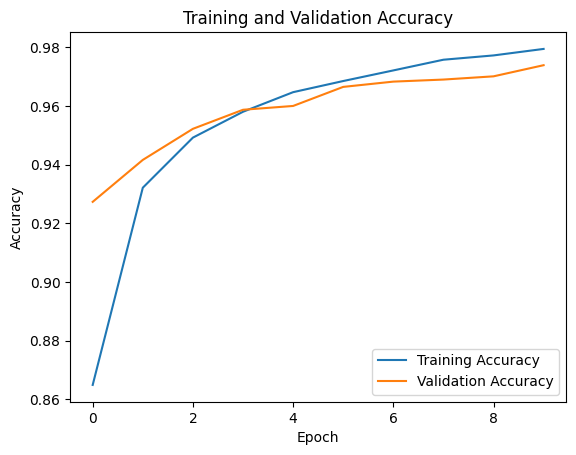

Test loss: 0.08794499933719635, Test accuracy 0.9739000201225281


In [5]:
# Define model
model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    metrics=['accuracy']
)

# Train the model and record history
fit_info = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Plot the training and validation accuracy
plt.plot(fit_info.history['accuracy'], label='Training Accuracy')
plt.plot(fit_info.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))


2.4. Update the model to implement a three-layer neural network where the hidden layers
 have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning)
 claimed this network could reach a validation accuracy of 0.9847
(http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights
2

Epoch 1/40


469/469 [==============================] - 10s 19ms/step - loss: 0.5046 - accuracy: 0.8884 - val_loss: 0.3206 - val_accuracy: 0.9326
Epoch 2/40
469/469 [==============================] - 9s 18ms/step - loss: 0.2936 - accuracy: 0.9447 - val_loss: 0.2716 - val_accuracy: 0.9507
Epoch 3/40
469/469 [==============================] - 9s 19ms/step - loss: 0.2411 - accuracy: 0.9598 - val_loss: 0.2341 - val_accuracy: 0.9596
Epoch 4/40
469/469 [==============================] - 9s 19ms/step - loss: 0.2101 - accuracy: 0.9681 - val_loss: 0.2042 - val_accuracy: 0.9678
Epoch 5/40
469/469 [==============================] - 9s 19ms/step - loss: 0.1890 - accuracy: 0.9737 - val_loss: 0.1959 - val_accuracy: 0.9686
Epoch 6/40
469/469 [==============================] - 9s 19ms/step - loss: 0.1740 - accuracy: 0.9780 - val_loss: 0.1797 - val_accuracy: 0.9744
Epoch 7/40
469/469 [==============================] - 9s 19ms/step - loss: 0.1607 - accuracy: 0.9815 - val_loss: 0.1834 - val_accuracy: 0.9721
Epoch 8/4

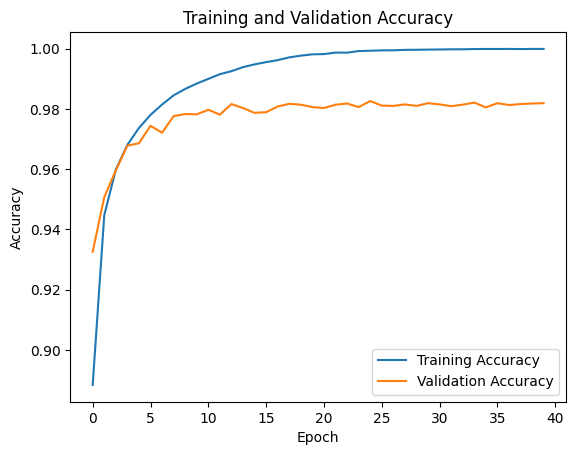

Test loss: 0.1217283234000206, Test accuracy 0.9818999767303467


In [6]:
from keras.regularizers import l2

# Define the updated model with L2 weight decay regularization
model = Sequential()
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(300, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    metrics=['accuracy']
)

# Train the model for 40 epochs and record history
fit_info = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=40,  # Train for 40 epochs
    verbose=1,
    validation_data=(x_test, y_test)
)

# Plot the training and validation accuracy
plt.plot(fit_info.history['accuracy'], label='Training Accuracy')
plt.plot(fit_info.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))


Noting that the selection of hyperparameters, data preprocessing, and weight decay may all play a role in achieving a particular validation accuracy. Geoff Hinton's claim that he achieved a validation accuracy of 0.9847 may have required further methods and improvements. To try to reach the desired accuracy, you can experiment with hyperparameters and regularization strength. 
(kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3
 replicates networks for each regularization factor. Plot the final validation accuracy
 with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hinton's result? – If you do not get the same
 results, what factors may influence this? (hint: What information is not given by Hinton
 on the MNIST database that may influence Model training)

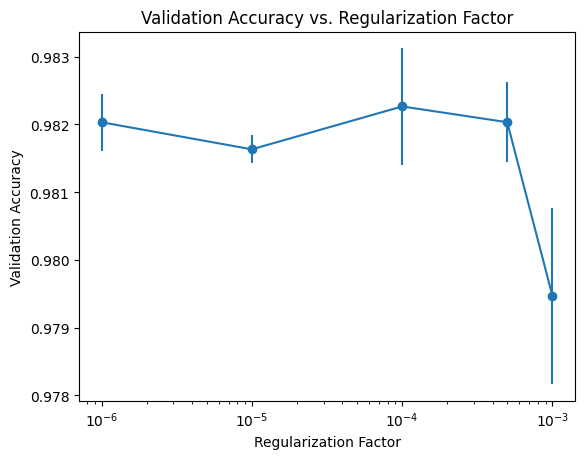

In [7]:
import numpy as np

# Define the selected regularization factors
regularization_factors = [1e-6, 1e-5, 1e-4, 5e-4, 1e-3]

# Initialize lists to store validation accuracies for each replicate
validation_accuracies = []

# Number of replicates for each regularization factor
num_replicates = 3

for reg_factor in regularization_factors:
    replicate_accuracies = []
    
    for _ in range(num_replicates):
        # Define the model with L2 weight decay regularization
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation='relu', kernel_regularizer=l2(reg_factor)))
        model.add(Dense(300, activation='relu', kernel_regularizer=l2(reg_factor)))
        model.add(Dense(num_classes, activation='softmax'))

        # Compile the model
        model.compile(
            loss=keras.losses.categorical_crossentropy,
            optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
            metrics=['accuracy']
        )

        # Train the model for 40 epochs
        fit_info = model.fit(
            x_train,
            y_train,
            batch_size=batch_size,
            epochs=40,
            verbose=0,
            validation_data=(x_test, y_test)
        )

        # Get the final validation accuracy for this replicate
        final_val_accuracy = fit_info.history['val_accuracy'][-1]
        replicate_accuracies.append(final_val_accuracy)

    validation_accuracies.append(replicate_accuracies)

# Plot the final validation accuracy with standard deviation
plt.errorbar(regularization_factors, np.mean(validation_accuracies, axis=1), yerr=np.std(validation_accuracies, axis=1), fmt='-o')
plt.title('Validation Accuracy vs. Regularization Factor')
plt.xlabel('Regularization Factor')
plt.ylabel('Validation Accuracy')
plt.xscale('log')
plt.show()


As can be seen in the above plot, the model achieved a high validation accuracy of 0.983. While Hinton’s
 accuracy is 0.9847.

A machine learning model's efficacy can be affected by a variety of factors, including the quantity and quality of the dataset, the complexity of the model's architecture, and hyperparameters choices (learning rate, batch size, and etc.). The performance of the model may be influenced by a number of factors, such as the preprocessing methods, the usage of data augmentation techniques, and the particular optimization algorithm applied. 

3. Convolutional layers

3.1. Design a model that makes use of at least one convolutional layer – how performant a
 model can you get? -- According to the MNIST database it should be possible reach to
 99% accuracy on the validation data. If you choose to use any layers apart from the
convolutional layers and layers that you used in previous questions, you must describe
 what they do. If you do not reach 99% accuracy, report your best performance, and
 explain your attempts and thought process.

Epoch 1/10
469/469 [==============================] - 59s 123ms/step - loss: 0.3048 - accuracy: 0.9069 - val_loss: 0.0595 - val_accuracy: 0.9817
Epoch 2/10
469/469 [==============================] - 67s 143ms/step - loss: 0.0975 - accuracy: 0.9706 - val_loss: 0.0421 - val_accuracy: 0.9862
Epoch 3/10
469/469 [==============================] - 58s 124ms/step - loss: 0.0715 - accuracy: 0.9790 - val_loss: 0.0327 - val_accuracy: 0.9890
Epoch 4/10
469/469 [==============================] - 58s 124ms/step - loss: 0.0588 - accuracy: 0.9824 - val_loss: 0.0324 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 58s 123ms/step - loss: 0.0501 - accuracy: 0.9853 - val_loss: 0.0295 - val_accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 58s 124ms/step - loss: 0.0438 - accuracy: 0.9870 - val_loss: 0.0258 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0266 - val_ac

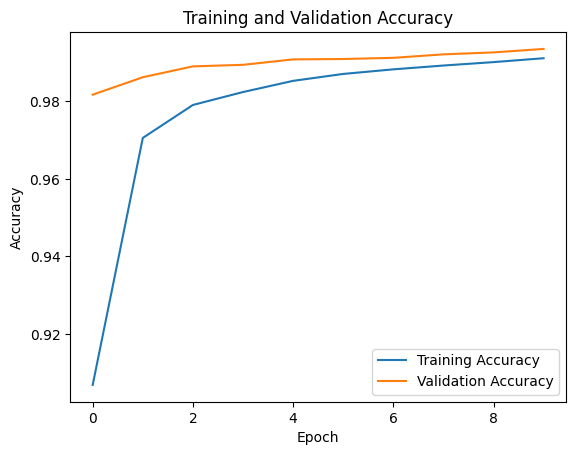

In [10]:
from keras.optimizers import Adam

model = Sequential()

# Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Max Pooling Layer 1: 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2: 64 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling Layer 2: 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layer 1: 128 neurons, ReLU activation
model.add(Dense(128, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer: 10 neurons, softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
fit_info = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Plot the training and validation accuracy
plt.plot(fit_info.history['accuracy'], label='Training Accuracy')
plt.plot(fit_info.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



As can be seen the achieved validation accuracy with this model is 99.35% whichis high accuracy. There is a small difference between the training and validation accuracies, which confirm that the model is not overfitted.

There are several types of layers that are usually used in neural networks, below is the list of the layers that we used in our network and their description:

1. MaxPooling2D Layer:
MaxPooling2D layer performs max pooling, which reduces the spatial dimensions of the input volume. It takes the maximum value from a group of neighboring pixels and transfers it to the next layer. This helps in reducing computation while focusing on the prominent features in each region.

2. Flatten Layer:
The Flatten layer is used to flatten the output of the previous layers. It transforms the multi-dimensional output into a one-dimensional array, suitable for feeding into the subsequent fully connected layers. This is necessary when moving from convolutional layers to fully connected layers.

3. Dense  Layer:
In Dense layer or Fully Connected each neuron is connected to every neuron in the previous and subsequent layers. This type of layer helps in learning global patterns and relationships in the data.

4. Dropout Layer:
The Dropout layer is used to reduce overfitting. It randomly sets a fraction of the input units to zero during each update, preventing the network from relying too much on any particular feature.


3.2. Discuss the differences and potential benefits of using convolutional layers over fully
 connected ones for the application?

Convolutional layers recognize patterns and features in local receptive fields of the input. This is very important in image processing, where close pixels often contain meaningful information. On the other hand, Fully connected layers  consider the entire input, potentially missing out on local patterns. Convolutional layers share parameters between different regions of the input, which reduces the overall number of parameters. This results in parameter efficiency in large image dataset.In addition Convolutional operations are computationally efficient. In convolutional layers each neuron is connected to only a small amount of the input, which helps to reduce computation and enhances the model's ability to capture local features efficiently. CNNs have multiple layers that learn features at different levels. Lower layers learn basic features like edges and textures, and higher layers combine these to learn complex patterns and shapes. What's more, convolutional layers are more parameter efficient and less prone to overfitting compared to fully connected layers.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05d86ed7-77dc-4d57-baa3-23063c711d41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>